## Goals of this notebook

To iteratively select which features need to be log transformed and which are fine as they are. 

### Hypothesis:
- All of the areas will need to be log transformed
    - living performs worse when it is log transformed
- Number of beds and baths probably have a logarithmic relationship. 

In [124]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

from statsmodels.formula.api import ols

import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
# import the data frames, have not been test train split yet.
X = pd.read_csv('../raw/X.csv')
y = pd.read_csv('../raw/y.csv', header=None)
df = pd.read_csv('../raw/kc_house_data_train.csv')
y.columns = ['price']
X.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [94]:
# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,               # Pass in our X and y
                                                    random_state=42,    # Abritary select a random_state 
                                                    test_size=.2        # Split test size to be 20% of full data.
                                                   )

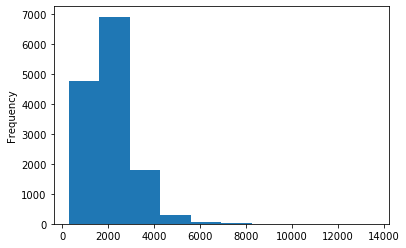

In [95]:
# let's look at the distribution of size living
sizes = None
X_train.loc[:,'sqft_living'].plot(kind='hist');

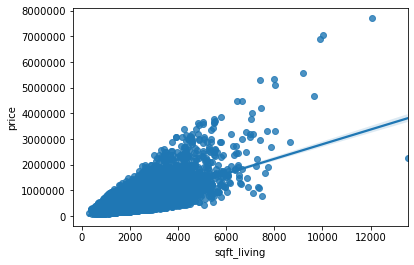

In [96]:
sns.regplot(data=df, x ='sqft_living', y = 'price');

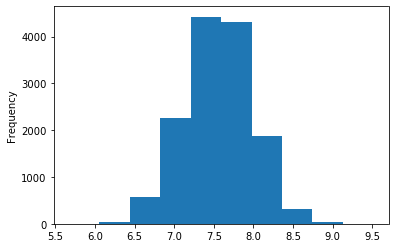

In [97]:
# log transform living

log_living = np.log(X_train.loc[:,'sqft_living'])
log_living.plot(kind='hist');

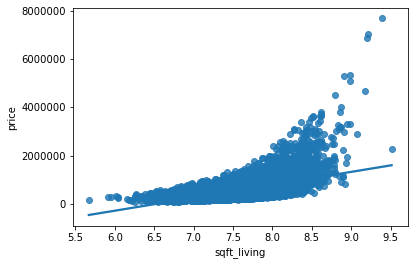

In [99]:
# check the new scatter plot
df_living_log = pd.concat([log_living, y_train], axis=1)
sns.regplot(data=df_living_log, x='sqft_living', y='price')


In [105]:
# See which performs better on ols

living = pd.concat([X_train['sqft_living'], y_train], axis=1)
formula = "price~sqft_living"
model = ols(formula=formula, data=living).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 1.360e+04
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        09:58:52   Log-Likelihood:            -1.9243e+05
No. Observations:               13832   AIC:                         3.849e+05
Df Residuals:                   13830   BIC:                         3.849e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.272e+04   5585.871     -9.438      0.000   -6.37e+04   -4.18e+04
sqft_living   285.0357      2.444    116.614      0.000     280.245     289.827
==============================================================================
Omnibus:                    10084.606   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           455053.066
Skew:                           3.020   Prob(JB):                         0.00
Kurtosis:                      30.442   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
# check log feature on ols
formula = "price~sqft_living"
model = ols(formula=formula, data=df_living_log).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     8155.
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        10:00:43   Log-Likelihood:            -1.9396e+05
No. Observations:               13832   AIC:                         3.879e+05
Df Residuals:                   13830   BIC:                         3.879e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.519e+06   4.51e+04    -78.119      0.000   -3.61e+06   -3.43e+06
sqft_living  5.377e+05   5954.178     90.307      0.000    5.26e+05    5.49e+05
==============================================================================
Omnibus:                    13351.435   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1489502.690
Skew:                           4.393   Prob(JB):                         0.00
Kurtosis:                      53.072   Cond. No.                         137.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
# standard scale log and living and repeat the above experiment
scalar = StandardScaler()
standard_df = scalar.fit_transform(X_train[['sqft_living', 'sqft_lot']])
standard_df = pd.DataFrame(standard_df)
standard_df.columns = ['stan_living', 'stan_lot']
standard_df_livLot = pd.concat([standard_df, y_train],axis=1)

formula = "price~stan_living"
model = ols(formula=formula, data=standard_df_livLot).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3405
Date:                Mon, 19 Oct 2020   Prob (F-statistic):              0.560
Time:                        10:12:26   Log-Likelihood:            -1.5788e+05
No. Observations:               11061   AIC:                         3.158e+05
Df Residuals:                   11059   BIC:                         3.158e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.457e+05   3637.598    150.015      0.000    5.39e+05    5.53e+05
stan_living -2140.5194   3668.511     -0.583      0.560   -9331.455    5050.416
==============================================================================
Omnibus:                    10621.675   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           871887.655
Skew:                           4.471   Prob(JB):                         0.00
Kurtosis:                      45.566   Cond. No.                         1.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

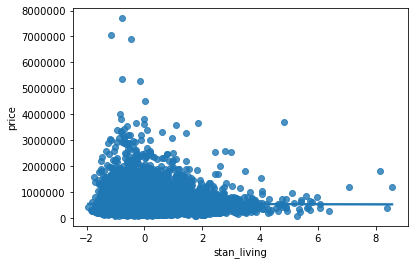

In [123]:
sns.regplot(data=standard_df_livLot, x='stan_living', y='price');

In [134]:
minMax_df

,0,1,price
0,0.156981,0.002896,NaN
1,0.135094,0.007910,NaN
2,0.030943,0.001168,NaN
3,0.166038,0.004035,NaN
4,0.126792,0.002730,NaN
...,...,...,...
11284,NaN,NaN,469000.0
11964,NaN,NaN,450000.0
5390,NaN,NaN,295000.0
860,NaN,NaN,459000.0


In [138]:
# try minmax scaling the data
minmax = MinMaxScaler()
minMax_df = minmax.fit_transform(X_train[['sqft_living', 'sqft_lot']])
minMax_df = pd.DataFrame(minMax_df)
minMax_df.columns = ['sqft_living','sqft_lot']
minMax_df = pd.concat([minMax_df, y_train], axis=1)

formula = "price~sqft_living"
model = ols(formula=formula, data=minMax_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3405
Date:                Mon, 19 Oct 2020   Prob (F-statistic):              0.560
Time:                        10:19:53   Log-Likelihood:            -1.5788e+05
No. Observations:               11061   AIC:                         3.158e+05
Df Residuals:                   11059   BIC:                         3.158e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.498e+05   7998.020     68.748      0.000    5.34e+05    5.66e+05
sqft_living -3.058e+04   5.24e+04     -0.583      0.560   -1.33e+05    7.22e+04
==============================================================================
Omnibus:                    10621.675   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           871887.655
Skew:                           4.471   Prob(JB):                         0.00
Kurtosis:                      45.566   Cond. No.                         14.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

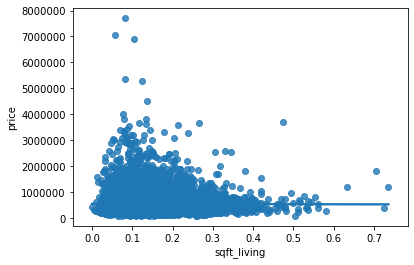

In [139]:
sns.regplot(data=minMax_df, x= 'sqft_living', y='price')

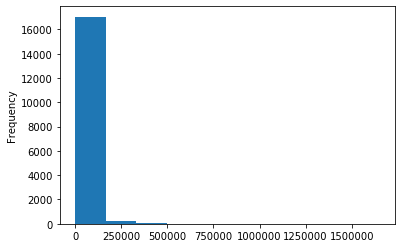

In [69]:
# check distribution of sqft_lot
X.loc[:,'sqft_lot'].plot(kind='hist');

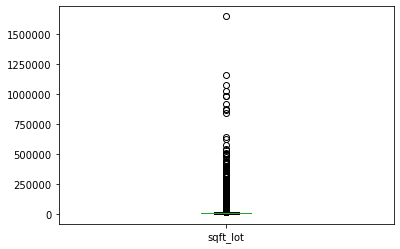

In [70]:
# Heavily skewed. Let's describe the column()
X.loc[:,'sqft_lot'].plot(kind='box');

In [71]:
# Seems to be some outliers in. Anything above the 75K marks.
sqft_lot = pd.concat([X, y], axis=1)
sqft_lot_outlier = sqft_lot[sqft_lot.sqft_lot > 750000]
sqft_lot_outlier.sort_values('price', ascending=False)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
16269,2624089007,20150320T000000,2,2.50,3900,920423,2.0,0,0,3,...,3900,0,2009,0,98065,47.5371,-121.756,2720,411962,1998000.0
397,2724079090,20150105T000000,4,3.25,3920,881654,3.0,0,3,3,...,3920,0,2002,0,98024,47.5385,-121.896,2970,112384,1650000.0
4666,1125079111,20150415T000000,4,5.50,6530,871200,2.0,0,2,3,...,6530,0,2008,0,98014,47.6640,-121.878,1280,858132,1600000.0
13543,722069232,20140905T000000,4,3.25,3770,982998,2.0,0,0,3,...,3770,0,1992,0,98058,47.4140,-122.087,2290,37141,998000.0
16243,2323089009,20150119T000000,4,3.50,4030,1024068,2.0,0,0,3,...,4030,0,2006,0,98045,47.4619,-121.744,1830,11700,855000.0
2296,3626079040,20140730T000000,2,3.00,2560,982278,1.0,0,0,3,...,2560,0,2004,0,98014,47.6955,-121.861,1620,40946,790000.0
718,1020069017,20150327T000000,4,1.00,1300,1651359,1.0,0,3,4,...,1300,0,1920,0,98022,47.2313,-122.023,2560,425581,700000.0
2705,2522029039,20140929T000000,3,2.00,3650,843309,2.0,0,0,4,...,3650,0,1991,0,98070,47.3627,-122.496,1870,273992,550000.0
13460,2623069031,20140521T000000,5,3.25,3010,1074218,1.5,0,0,5,...,2010,1000,1931,0,98027,47.4564,-122.004,2450,68825,542500.0
11616,3326079016,20150504T000000,2,1.00,710,1164794,1.0,0,0,2,...,710,0,1915,0,98014,47.6888,-121.909,1680,16730,190000.0


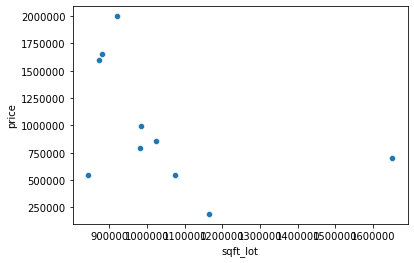

In [72]:
sns.scatterplot(data=sqft_lot_outlier[['price', 'sqft_lot']], x = 'sqft_lot', y='price');

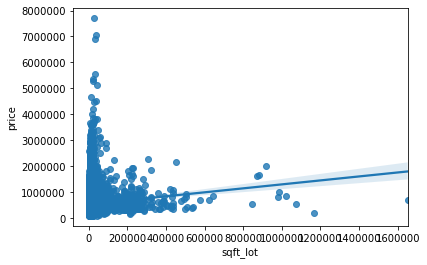

In [73]:
# seems like there is no good relationship between preice and sqaure footage in the outliers. 

# check all 
# No good relationship. Certainly
sns.regplot(data = sqft_lot, x= 'sqft_lot', y = 'price');

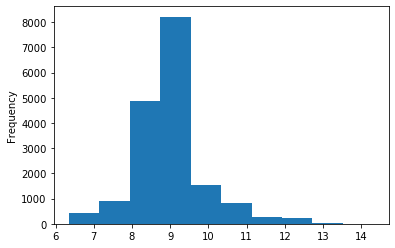

In [74]:
# Log transform it 
log_sqft_lot = np.log(X.loc[:,'sqft_lot'])
log_sqft_lot.plot(kind='hist');

,price,sqft_lot
0,365000.0,9.093020
1,865000.0,8.814330
2,1038000.0,9.295876
3,1490000.0,9.589325
4,711000.0,8.589700
...,...,...
17285,750000.0,9.206332
17286,440000.0,8.294050
17287,310000.0,9.197863
17288,427500.0,10.673272


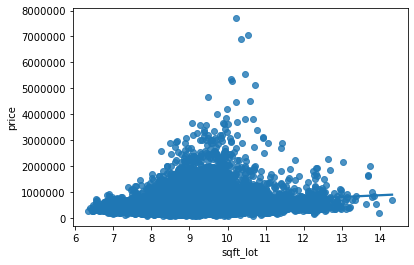

In [79]:
# sns.regplot(data=pd.concat([log_sqft_lot, y], axis=1))
log_df= pd.concat([y, log_sqft_lot], axis=1)
sns.regplot(data=log_df, x ="sqft_lot", y='price' )
log_df

### I think we have to engineer a feature. There is likely some interaction between lot size and living size. 

living_lot_ratio

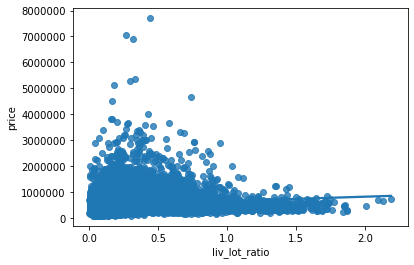

In [155]:
living_lot_ratio = X_train['sqft_living']/X_train['sqft_lot']
living_lot_df = pd.concat([living_lot_ratio, y_train], axis=1)
living_lot_df.columns = ['liv_lot_ratio', 'price']
sns.regplot(data=living_lot_df, x='liv_lot_ratio', y='price')

In [154]:
formula = "price~liv_lot_ratio"
model = ols(formula=formula, data=living_lot_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     190.1
Date:                Mon, 19 Oct 2020   Prob (F-statistic):           5.90e-43
Time:                        10:34:31   Log-Likelihood:            -1.9708e+05
No. Observations:               13832   AIC:                         3.942e+05
Df Residuals:                   13830   BIC:                         3.942e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       4.89e+05   5017.918     97.453      0.000    4.79e+05    4.99e+05
liv_lot_ratio  1.669e+05   1.21e+04     13.787      0.000    1.43e+05    1.91e+05
==============================================================================
Omnibus:                    13182.200   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1047759.111
Skew:                           4.432   Prob(JB):                         0.00
Kurtosis:                      44.706   Cond. No.                         4.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

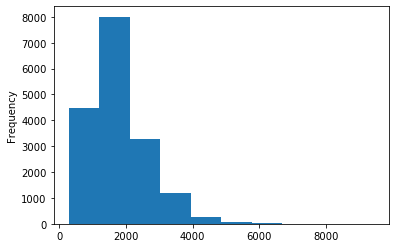

In [57]:
# Next up let's look at square foot above
X.loc[:,'sqft_above'].plot(kind='hist');